# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [11]:
import pandas as pd

In [12]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [13]:
#1
facts['density'] = facts['Pop_2020']/facts['Area_land']
facts['density'].sort_values(ascending=False)[:5]

9     4364.208861
32     487.688035
43     409.775579
42     370.531574
23     347.981239
Name: density, dtype: float64

In [14]:
#2
facts[(facts['Area_water']>facts['Area_land'])]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,density
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,305.272989


In [15]:
#3
facts['increasePop'] = facts['Pop_2020']-facts['Pop_2010']
facts.sort_values(by='increasePop', ascending=False).head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,density,increasePop
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,San Antonio,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,43.077247,3999944.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,Miami,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0,155.077055,2736877.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,97.996419,2284267.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,Augusta,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,1024255.0
52,Washington,184661,172119,12542,7705281.0,6724540,10,Willow goldfinch (American goldfinch),Coast rhododendron,Al-ki,...,Spokane,219190.0,Tacoma,216279.0,Vancouver,183012.0,Bellevue,147599.0,44.767173,980741.0


In [16]:
#4
df = facts[['Pop_2020', 'State_bird']]
df.sort_values(by='Pop_2020', ascending=False).head(1)

,Pop_2020,State_bird
5,39538223.0,California quail


In [17]:
#4
df = facts[['Pop_2020', 'Area_land']]
df.sort_values(by='Pop_2020', ascending=False).head(1)

,Pop_2020,Area_land
5,39538223.0,403466


In [73]:
#5
facts[facts['Capital']==facts['City_1']]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,density,increasePop,percentageDro,percentageDrop
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,24.307722,759485.0,84.811944,84.811944
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,22.345490,95606.0,60.980579,60.980579
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Aurora,374114.0,Fort Collins,167830.0,Lakewood,156798.0,21.509118,744518.0,78.438445,78.438445
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861,87822.0,NaN,NaN
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,1024255.0,70.959391,70.959391
14,Idaho,216443,214045,2398,1839106.0,1567582,2,Mountain bluebird,"Syringa, mock orange",Esto perpetua,...,Nampa,96252.0,Idaho Falls,63398.0,Caldwell,56541.0,8.592147,271524.0,75.305186,75.305186
16,Indiana,94326,92789,1537,6785528.0,6483802,9,Northern cardinal,Peony,The crossroads of America,...,Evansville,117963.0,South Bend,103290.0,Carmel,99329.0,73.128582,301726.0,88.666041,88.666041
17,Iowa,145746,144669,1077,3190369.0,3046355,4,Eastern goldfinch (American goldfinch),Wild rose,Our liberties we prize and our rights we will ...,...,Davenport,102085.0,Sioux City,82396.0,Iowa City,76290.0,22.052886,144014.0,64.389905,64.389905
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239,482288.0,83.876697,83.876697
26,Mississippi,125438,121531,3907,2961279.0,2967297,4,Northern mockingbird,Magnolia,Virtute et armis,...,Southaven,54944.0,Biloxi,45968.0,Hattiesburg,45951.0,24.366450,-6018.0,71.392908,71.392908


In [51]:
#6
facts['percentageDrop'] = 100*(facts['city_1_pop'] - facts['city_5_pop'])/ facts['city_1_pop']
facts.sort_values(by= 'percentageDrop', ascending = False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,density,increasePop,percentageDro,percentageDrop
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,165.506681,823147.0,98.392453,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [37]:
state = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
merge = pd.merge(facts,state,left_on='USPS_code',right_on='Abbreviation',how='outer')
merge

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_4,city_4_pop,City_5,city_5_pop,density,increasePop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Mobile,189572.0,Tuscaloosa,101113.0,38.303276,244543.0,Alabama,"December 14, 1819",State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Wasilla,10529.0,Sitka,8647.0,0.496221,23160.0,Alaska,"January 3, 1959",State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818,-6082.0,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Chandler,257165.0,Scottsdale,255310.0,24.307722,759485.0,Arizona,"February 14, 1912",State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Springdale,81029.0,Jonesboro,76990.0,22.345490,95606.0,Arkansas,"June 15, 1836",State,AR
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Francisco,884198.0,Fresno,530093.0,97.996419,2284267.0,California,"September 9, 1850",State,CA
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Fort Collins,167830.0,Lakewood,156798.0,21.509118,744518.0,Colorado,"August 1, 1876",State,CO
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,Hartford,122105.0,Waterbury,108093.0,287.509488,31847.0,Connecticut,"January 9, 1788",State,CT
8,Delaware,6446,5047,1399,989948.0,897934,1,Delaware Blue Hen,Peach blossom,Liberty and independence,...,Middletown,22582.0,Smyrna,11580.0,196.145829,92014.0,Delaware,"December 7, 1787",State,DE
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,4364.208861,87822.0,District of Columbia,"February 21, 1871",Federal District,DC


In [61]:
#7 
merge['Datetime'] = pd.to_datetime(state['Date'],errors='raise')
pre1790=merge[merge['Datetime'] < pd.datetime(1970,1,1)]
most_common_flower=pre1790['State_flower'].mode()[0]
print(most_common_flower)

Goldenrod 


/tmp/ipykernel_1582264/672333138.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pre1790=merge[merge['Datetime'] < pd.datetime(1970,1,1)]


In [62]:
#8
merge[merge['Status']=='Territory'].sort_values(by='density').head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_4_pop,City_5,city_5_pop,density,increasePop,Name,Date,Status,Abbreviation,Datetime
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,0.0,NaN,NaN,0.108051,-53832.0,Northern Mariana Islands,"November 4, 1986",Territory,MP,1986-11-04
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,15191.0,Barrigada,8875.0,0.310129,-159189.6,Guam,"April 11, 1899",Territory,GU,1899-04-11
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,3195.0,Pava'ia'i,2450.0,249.681818,-6082.0,American Samoa,"April 17, 1900",Territory,AS,1900-04-17
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,5128.0,Southcentral,3277.0,305.272989,-170.0,United States Virgin Islands,"March 31, 1917",Territory,VI,1917-03-31
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,133191.0,Caguas,124434.0,370.531574,-439915.0,Puerto Rico,"April 11, 1899",Territory,PR,1899-04-11


In [63]:
#8
merge[merge['Status']=='State'].sort_values(by='density').head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_4_pop,City_5,city_5_pop,density,increasePop,Name,Date,Status,Abbreviation,Datetime
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,10529.0,Sitka,8647.0,0.496221,23160.0,Alaska,"January 3, 1959",State,AK,1959-01-03
55,Wyoming,253335,251470,1864,576851.0,563626,1,Western meadowlark,Indian paintbrush,Equal Rights and Cedant arma togae.,...,31903.0,Rock Springs,23082.0,2.293916,13225.0,Wyoming,"July 10, 1890",State,WY,1890-07-10
28,Montana,380831,376962,3869,1084225.0,989415,2,Western meadowlark,Bitterroot,Oro y plata,...,48532.0,Butte,34284.0,2.876218,94810.0,Montana,"November 8, 1889",State,MT,1889-11-08
36,North Dakota,183108,178711,4397,779094.0,672591,1,Western meadowlark,Wild prairie rose,"Liberty and union, now and forever, one and in...",...,47340.0,West Fargo,36566.0,4.359519,106503.0,North Dakota,"November 2, 1889",State,ND,1889-11-02
45,South Dakota,199729,196350,3379,886667.0,814180,1,Ring-necked pheasant,Pasque flower,Under God the people rule,...,24509.0,Watertown,22153.0,4.515747,72487.0,South Dakota,"November 2, 1889",State,SD,1889-11-02


In [ ]:
#8
Puerto Rico has the larger population density which is the most dense Territory

In [68]:
import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer

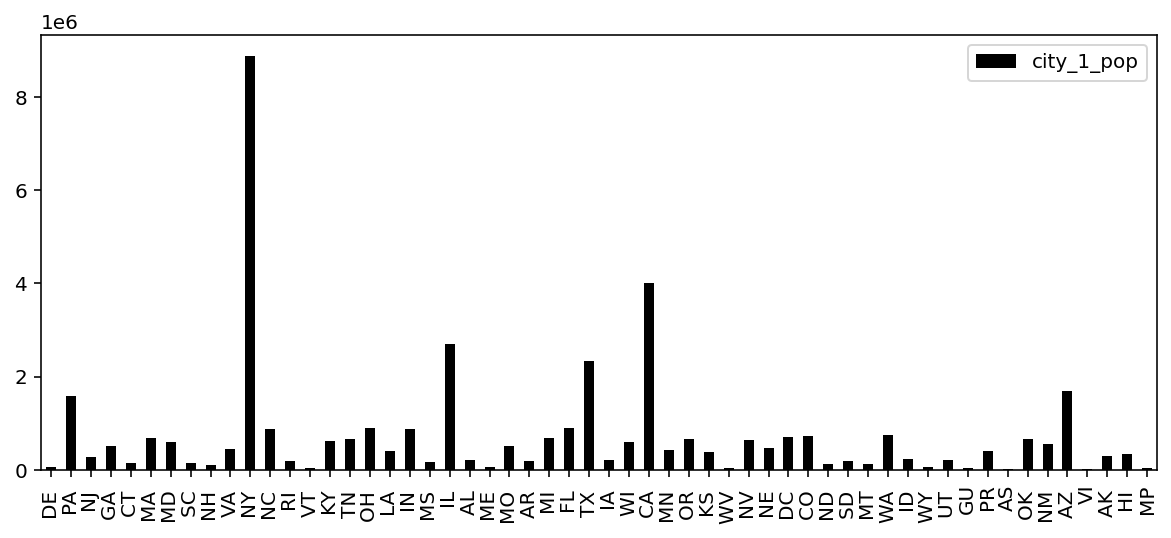

In [69]:
#9
plot_data = merge.sort_values(by='Datetime')[['city_1_pop', 'Abbreviation', 'Area_land', 'Area_water', ]]
plot =plot_data[['city_1_pop','Abbreviation']].plot(kind='bar',color ='k', figsize=(10,4))
plot.set_xticklabels(plot_data['Abbreviation']);

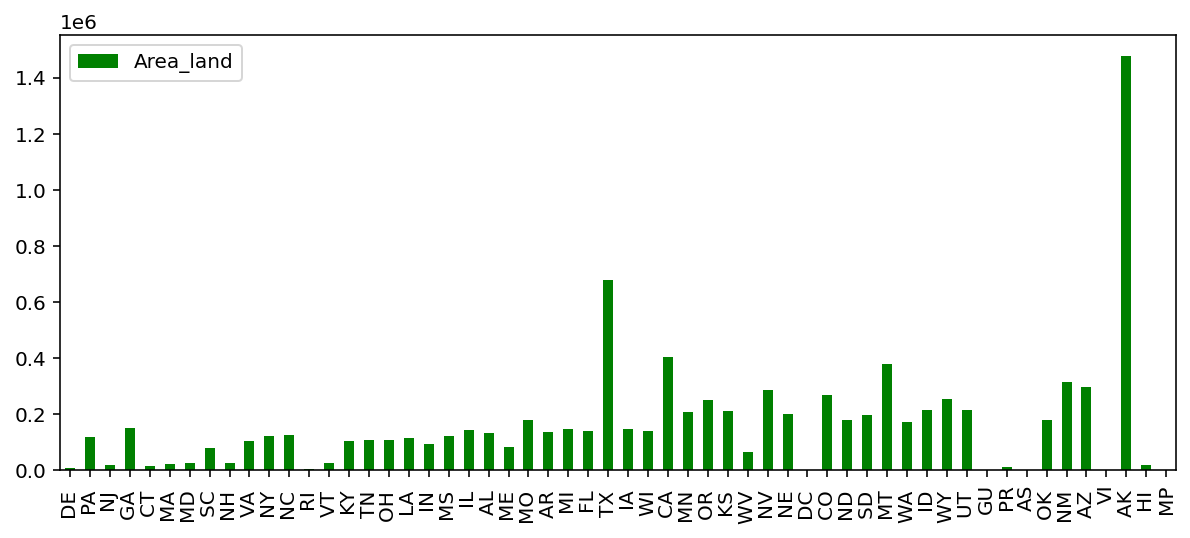

In [70]:
#10
plot =plot_data[['Area_land','Abbreviation']].plot(kind='bar',color ='g', figsize=(10,4))
plot.set_xticklabels(plot_data['Abbreviation']);

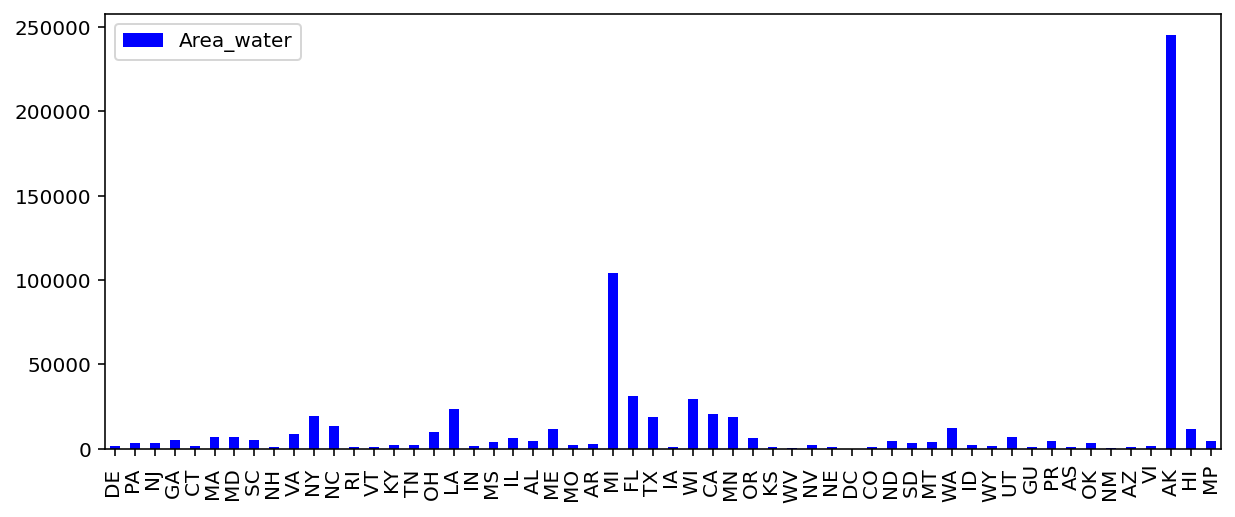

In [71]:
#10
plot =plot_data[['Area_water','Abbreviation']].plot(kind='bar',color ='b', figsize=(10,4))
plot.set_xticklabels(plot_data['Abbreviation']);

In [ ]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);